介绍了numpy中的统计函数和常见分布

In [30]:
import numpy as np
import matplotlib.pyplot as plt

### 统计值

In [3]:
# np.max最大值，np.min嘴小值
a = np.arange(12).reshape(3,4)
print("最小值：{}".format(np.min(a)))
print("最大值：{}".format(np.max(a)))

最小值：0
最大值：11


In [4]:
# np.amin, np.amax沿指定轴的最大/小值, 若不指定，则返回整个array的最大/小
a = np.arange(12).reshape(3,4)
print(a)
print("沿axis=0的最小值：{}".format(np.amin(a,0)))   # 沿着axis=0方向进行对比，即每列中的最大值
print("沿axis=1的最大值：{}".format(np.amax(a,1)))   # 沿着axis=1方向进行对比，即每行中的最大值

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
沿axis=0的最小值：[0 1 2 3]
沿axis=1的最大值：[ 3  7 11]


In [5]:
# np.ptp 返回沿轴的值的范围（最大值-最小值）
a = np.array([[3,7,5],[8,4,3],[2,4,9]])
print(a)
print(np.ptp(a, axis=0))   # 沿着axis=0方向进行对比，即每列中的最大值-最小值
print(np.ptp(a, axis=1))   # 沿着axis=1方向进行对比，即每行中的最大值-最小值
print(np.ptp(a))

[[3 7 5]
 [8 4 3]
 [2 4 9]]
[6 3 6]
[4 5 7]
7


In [7]:
# numpy.percentile(a, q, axis)  取array中的百分位数, 参数q为百分位
a = np.array([[30,40,70],[80,20,10],[50,90,60]])
print(a)
print(np.percentile(a, 50, axis=0))    
print(np.percentile(a, 50, axis=1)) 
print(np.percentile(a, 50)) 

[[30 40 70]
 [80 20 10]
 [50 90 60]]
[50. 40. 60.]
[40. 20. 60.]
50.0


In [8]:
# 类似的函数还包括
# np.meadian()    中位数
# np.mean()   算数平均数
# np.average()    提供了weight参数，可计算加权平均数
# np.var()   方差
# np.std()   标准差

### 常见分布及其采样

#### 二项分布

设想你来到了一个17世纪的赌场，正在对一个硬币赌博游戏下8份赌注。每一轮抛9枚硬币， 如果少于5枚硬币正面朝上，你将损失8份赌注中的1份；否则，你将赢得1份赌注。我们来模拟 一下赌博的过程， 初始资本为1000份赌注。

In [26]:
# 假设1w轮的游戏
rounds = 10000   # 轮
cash = np.full(rounds, 1000)
coins = np.random.binomial(9, 0.5, rounds)

In [27]:
cash[:5]

array([1000, 1000, 1000, 1000, 1000])

In [22]:
coins[:5]

array([6, 2, 3, 6, 3])

In [24]:
def judge(x):
    if x < 5:
        return -1
    else:
        return 1
win_lost = np.vectorize(judge)
results = win_lost(coins)
results[:5]

array([ 1, -1, -1,  1, -1])

In [31]:
out = cash + np.cumsum(results)

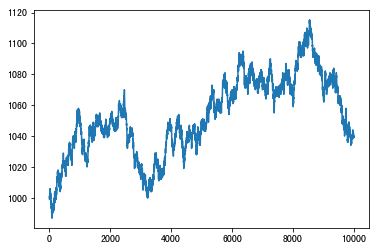

In [32]:
plt.plot(out)

#### 正态分布